# Projeto Final - Fifa 18 More Complete Player Dataset

In [3]:
#importar todas as bibliotecas necessárias

import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math as math
from scipy import stats
import statsmodels.api as sm
from scipy.stats import uniform, expon, norm, probplot, percentileofscore, t

C:\Users\VICTOR HABIB\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
#rodar o dataset

fifa = pd.read_csv("CompleteDataset.csv")

C:\Users\VICTOR HABIB\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Análise exploratória

In [5]:
fifa.head(10)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [6]:
#remover itens que não serão úteis na análise

fifa_limpo = fifa.drop(columns=['Unnamed: 0', 'Photo', 'Flag', 'Club Logo'])

In [7]:
fifa_limpo.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,89,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,94,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,88,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,€355K,2143,79,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,De Gea,26,Spain,90,92,Manchester United,€64.5M,€215K,1458,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,€295K,2096,93,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,€340K,2165,60,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,G. Higuaín,29,Argentina,90,90,Juventus,€77M,€275K,1961,78,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


# Estatísticas descritivas

In [8]:
fifa_limpo.describe()

,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,ID,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,17981.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,207658.710138,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,32291.667313,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,16.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,192622.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,214057.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,231448.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,241219.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


In [9]:
def troca(preco):
    multiplier = preco[-1]
    preco = preco[1:-1]
    
    if multiplier == "M":
        return float(preco) * 10**(6)
    elif multiplier == "K":
        return float(preco) * 10**(3)

In [10]:
lista = []
for x in fifa["Value"]:
    lista.append(troca(x))

In [11]:
fifa["Value"] = lista

In [12]:
fifa["Value"].head(10)

0     95500000.0
1    105000000.0
2    123000000.0
3     97000000.0
4     61000000.0
5     92000000.0
6     64500000.0
7     90500000.0
8     79000000.0
9     77000000.0
Name: Value, dtype: float64

# Distribuição das idades dos jogadores

In [13]:
#dados básicos de idade

fifa.Age.describe()

count    17981.000000
mean        25.144541
std          4.614272
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         47.000000
Name: Age, dtype: float64

In [14]:
#média e desvio padrão mais precisos

media, dp = norm.fit(fifa.Age)

print('Média: {0}'.format(media))
print('Desvio Padrão: {0}'.format(dp))

Média: 25.144541460430453
Desvio Padrão: 4.614144033551294


In [15]:
#idade mínima e máxima

idade_min = 16
idade_max = 47

print('Idade do jogador mais jovem: {0} anos'.format(idade_min))
print('Idade do jogador mais velho: {0} anos'.format(idade_max))

Idade do jogador mais jovem: 16 anos
Idade do jogador mais velho: 47 anos


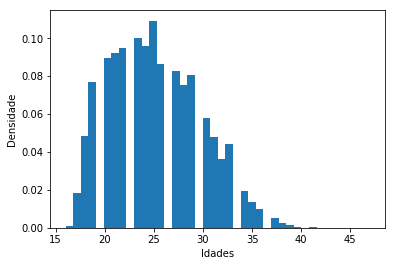

In [16]:
idades=[]
for dados_idade in fifa.Age:
    idades.append(dados_idade)
plt.hist(idades, density=True, bins= 40);
plt.ylabel('Densidade');
plt.xlabel('Idades');

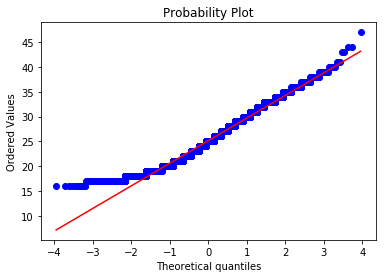

In [17]:
#Verificar graficamente se a distribuição normal é um modelo adequado para as idades dos jogadores

stats.probplot(idades, dist='norm', plot=plt);

Percebe-se que a distribuição normal pode ser considerada aceitável como modelo para as idades dos jogadores, pois grande parte dos pontos se encontram sobre a linha vermelha (diagonal). Entretanto não pode-se afirmar que é uma distribuição perfeita.

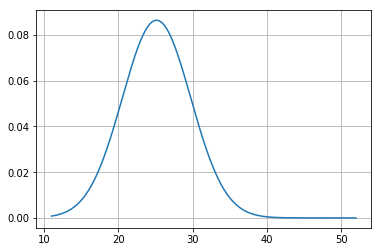

In [18]:
x = np.linspace(idade_min-5, idade_max+5, 1000)
y = norm.pdf(x, loc=media , scale=dp)
plt.plot(x, y)
plt.grid(True)
plt.show()

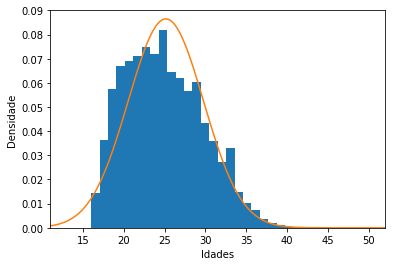

In [19]:
#plotar

plt.hist(idades, density=True, bins= 30)
plt.axis([idade_min-5, idade_max+5, 0, 0.09])
plt.ylabel('Densidade')
plt.xlabel('Idades')
plt.plot(x, y)
plt.show()

# Habilidade x Habilidades

In [20]:
player_attributes = pd.read_excel('AttributesDataset.xlsx')

In [21]:
player_attributes.dtypes

Acceleration          int64
Aggression            int64
Agility               int64
Balance               int64
Ball control          int64
Composure             int64
Crossing              int64
Curve                 int64
Dribbling             int64
Finishing             int64
Free kick accuracy    int64
GK diving             int64
GK handling           int64
GK kicking            int64
GK positioning        int64
GK reflexes           int64
Heading accuracy      int64
ID                    int64
Interceptions         int64
Jumping               int64
Long passing          int64
Long shots            int64
Marking               int64
Penalties             int64
Positioning           int64
Reactions             int64
Short passing         int64
Shot power            int64
Sliding tackle        int64
Sprint speed          int64
Stamina               int64
Standing tackle       int64
Strength              int64
Vision                int64
Volleys               int64
dtype: object

In [22]:
player_attributes

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11
5,79,80,78,80,89,87,62,77,85,91,...,91,83,88,19,83,79,42,84,78,87
6,57,38,60,43,42,64,17,21,18,13,...,88,50,31,13,58,40,21,64,68,13
7,93,54,93,91,92,87,80,82,93,83,...,85,86,79,22,87,79,27,65,86,79
8,60,60,71,69,89,85,85,85,79,76,...,86,90,87,69,52,77,82,74,88,82
9,78,50,75,69,85,86,68,74,84,91,...,88,75,88,18,80,72,22,85,70,88


In [23]:
#def transforma_float(coluna):
    #player_attributes[coluna] = player_attributes[coluna].astype('float')

    

In [24]:
#transforma_float("Acceleration")

In [25]:
player_attributes.head(10)

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11
5,79,80,78,80,89,87,62,77,85,91,...,91,83,88,19,83,79,42,84,78,87
6,57,38,60,43,42,64,17,21,18,13,...,88,50,31,13,58,40,21,64,68,13
7,93,54,93,91,92,87,80,82,93,83,...,85,86,79,22,87,79,27,65,86,79
8,60,60,71,69,89,85,85,85,79,76,...,86,90,87,69,52,77,82,74,88,82
9,78,50,75,69,85,86,68,74,84,91,...,88,75,88,18,80,72,22,85,70,88


Escolhendo variáveis

In [26]:
print(player_attributes.columns)

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'ID',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')


In [32]:
linhas = []
i = 0
while i < len(fifa["Unnamed: 0"]):
    linhas.append(fifa["Unnamed: 0"][i])
    i+=1

coluna = ['Acceleration', 'Aggression']

df = player_attributes.loc[linhas, coluna]
"""
df = DataFrame(player_attributes,columns= ['Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'])

print(df)
"""
df

,Acceleration,Aggression
0,89,63
1,92,48
2,94,56
3,88,78
4,58,29
5,79,80
6,57,38
7,93,54
8,60,60
9,78,50


In [33]:
df.corr()

,Acceleration,Aggression
Acceleration,1.000000,0.251771
Aggression,0.251771,1.000000


# Potencial x Idade

In [34]:
colunas = ["Age", "Overall", "Potential"]

pot_age_ovrl = fifa.loc[linhas, colunas]

#corr_pot_age = fifa.corr('Potential', 'Age')
pot_age_ovrl

,Age,Overall,Potential
0,32,94,94
1,30,93,93
2,25,92,94
3,30,92,92
4,31,92,92
5,28,91,91
6,26,90,92
7,26,90,91
8,27,90,90
9,29,90,90


In [35]:
#potencial = overall - potential

potencial = []
for dado1 in pot_age_ovrl.Potential:
    potencial.append(dado1)

overall = []
for dado2 in pot_age_ovrl.Overall:
    overall.append(dado2)
    

potencial_overall = []
i = 0
j = 0
while i < len(potencial):
    while j < len(overall):
        valor = potencial[i] - overall[j]
        potencial_overall.append(valor)
        j+=1
        i+=1
    




    
print(potencial_overall)

[0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 5, 5, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 2, 4, 2, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 7, 4, 1, 3, 0, 0, 0, 3, 4, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 8, 7, 5, 6, 3, 3, 3, 5, 4, 3, 6, 4, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 9, 5, 4, 6, 8, 5, 6, 6, 5, 3, 7, 2, 6, 3, 5, 1, 3, 4, 3, 0, 3, 5, 5, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 9, 6, 7, 0, 3, 1, 8, 6, 6, 5, 6, 8, 6, 3, 1, 8, 0, 0, 0, 6, 5, 3, 4, 3, 4, 4, 0, 2, 3, 0, 5, 5, 7, 5, 1, 3, 3, 0, 3, 0, 0, 4, 2, 0, 1, 3, 0, 1, 0, 2, 0, 2, 3, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 6, 7, 6, 6, 7, 2, 4, 6, 1, 8, 6, 5, 6, 6, 5, 5, 0, 4, 6, 3, 7, 6, 1, 3, 5, 5, 2, 2, 5, 1, 0, 5, 

In [36]:
s = pd.Series(potencial_overall)
s

0         0
1         0
2         2
3         0
4         0
5         0
6         2
7         1
8         0
9         0
10        0
11        3
12        3
13        0
14        0
15        0
16        0
17        0
18        0
19        5
20        5
21        3
22        2
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
17951    10
17952    20
17953    19
17954    16
17955    15
17956    16
17957    14
17958    12
17959    17
17960    22
17961    26
17962    16
17963    11
17964    20
17965    14
17966    20
17967    20
17968    21
17969    20
17970     9
17971    18
17972    16
17973    12
17974    10
17975     0
17976    17
17977     0
17978    15
17979    18
17980    18
Length: 17981, dtype: int64

In [53]:
pot_age_ovrl['Evolução'] = s

In [55]:
pot_age_ovrl

,Age,Overall,Potential,Evolução
0,32,94,94,0
1,30,93,93,0
2,25,92,94,2
3,30,92,92,0
4,31,92,92,0
5,28,91,91,0
6,26,90,92,2
7,26,90,91,1
8,27,90,90,0
9,29,90,90,0


In [56]:
corr_potencial_idade =  pot_age_ovrl.corr()

In [57]:
corr_potencial_idade

,Age,Overall,Potential,Evolução
Age,1.000000,0.459765,-0.218264,-0.862277
Overall,0.459765,1.000000,0.683474,-0.534526
Potential,-0.218264,0.683474,1.000000,0.251605
Evolução,-0.862277,-0.534526,0.251605,1.000000


In [58]:
colunas = ["Age", "Evolução"]



pot_age = pot_age_ovrl.loc[linhas, colunas]

In [59]:
pot_age

,Age,Evolução
0,32,0
1,30,0
2,25,2
3,30,0
4,31,0
5,28,0
6,26,2
7,26,1
8,27,0
9,29,0


Ajuste linear entre X3 e X4:
Coeficiente linear: 29.708323020232875
Coeficiente angular: -0.9849252776380094


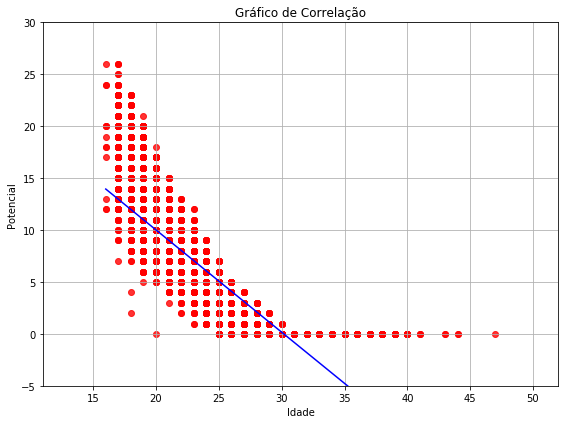

None


In [63]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Gráfico de Correlação')
    plt.axis([idade_min-5, idade_max+5, -5, 30])
    plt.xlabel('Idade')
    plt.ylabel('Potencial')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
print (reta(pot_age['Age'], pot_age['Evolução']))

In [61]:
pot_age.corr()

,Age,Evolução
Age,1.000000,-0.862277
Evolução,-0.862277,1.000000


Percebe-se que a idade e o potencial que o jogador tem para aprimorar suas habilidades se correlacionam de modo que os jogadores mais jovens são mais aptos a se desenvolverem no jogo, enquanto os mais velhos não possuem tal potencial. Esse critério se relaciona bastante com a experiência, ou seja, os novatos na profissão não

# IDADE X OVERALL

In [ ]:
linhas = linhas
colunas = ["Age", "Overall"]
age_ovrl = fifa.loc[linhas, colunas]

In [ ]:
age_ovrl

In [ ]:
corr_age_ovrl = age_ovrl.corr()

In [ ]:
corr_age_ovrl

In [ ]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Gráfico de Correlação')
    plt.axis([idade_min-5, idade_max+5, 30, 100])
    plt.xlabel('Idade')
    plt.ylabel('Overall')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
print (reta(age_ovrl['Age'], age_ovrl['Overall']))

Percebe-se que a idade não se correlaciona com as qualidades do jogador (overall). Assim, é viável afirmar que há jogadores jovens tão bons quanto jogadores mais velhos.

# Distribuição Overall

In [ ]:
fifa_limpo.Overall.describe()

In [ ]:
media, dp = norm.fit(fifa.Overall)

print('Média: {0}'.format(media))
print('Desvio Padrão: {0}'.format(dp))

In [ ]:
overall_min = 46
overall_max = 94

print('Overall mais baixo do jogo: {0}'.format(overall_min))
print('Overall mais alto do jogo: {0}'.format(overall_max))

In [ ]:
overalls=[]=
for dados_overall in fifa.Overall:
    overalls.append(dados_overall)
plt.hist(overalls, density=True, bins= 40);
plt.ylabel('Densidade');
plt.xlabel('Overall');

In [ ]:
#Verificar graficamente se a distribuição normal é um modelo adequado para o overall dos jogadores

stats.probplot(overalls, dist='norm', plot=plt);

Percebe-se que a distribuição normal pode ser considerada aceitável como modelo para o overall dos jogadores, pois grande parte dos pontos se encontram sobre a linha vermelha (diagonal).

In [ ]:
x = np.linspace(overall_min-5, overall_max+5, 1000)
y = norm.pdf(x, loc=media , scale=dp)
plt.plot(x, y)
plt.grid(True)
plt.show()

In [ ]:
#plotar

plt.hist(overalls, density=True, bins= 30)
plt.axis([overall_min-5, overall_max+5, 0, 0.09])
plt.ylabel('Densidade')
plt.xlabel('Overall')
plt.plot(x, y)
plt.show()